In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [22]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [23]:
img_width = 180
img_height =180 

In [24]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [25]:
data_cat = data_train.class_names

In [26]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


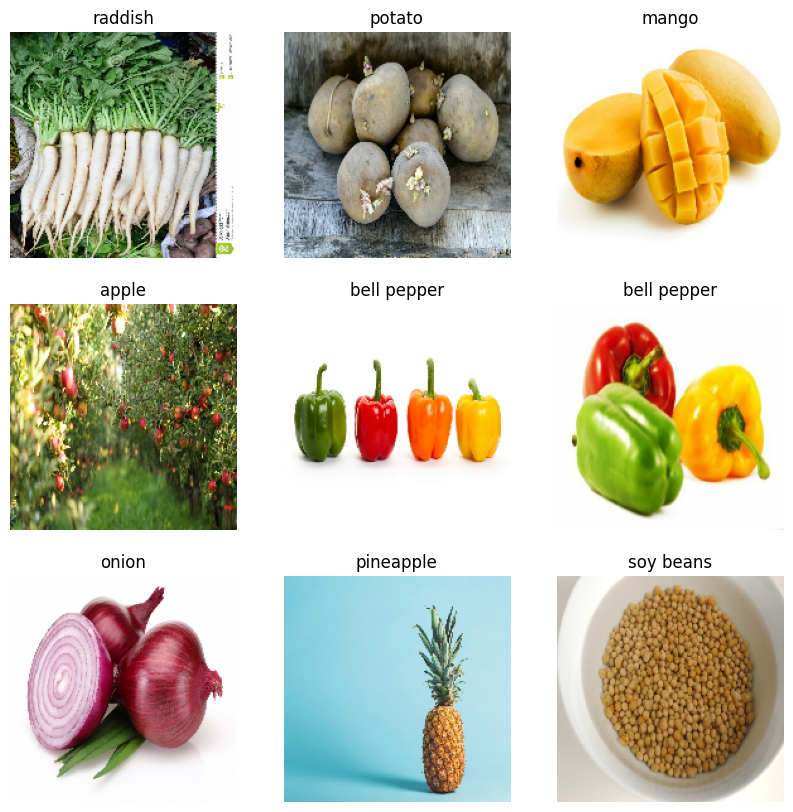

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 642ms/step - accuracy: 0.0597 - loss: 3.8069 - val_accuracy: 0.2593 - val_loss: 2.6621
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 495ms/step - accuracy: 0.2329 - loss: 2.7323 - val_accuracy: 0.5242 - val_loss: 1.7963
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 491ms/step - accuracy: 0.4064 - loss: 2.0747 - val_accuracy: 0.7550 - val_loss: 0.9845
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 485ms/step - accuracy: 0.5987 - loss: 1.3840 - val_accuracy: 0.8177 - val_loss: 0.7259
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 488ms/step - accuracy: 0.7534 - loss: 0.8568 - val_accuracy: 0.9088 - val_loss: 0.4175
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 487ms/step - accuracy: 0.8637 - loss: 0.5098 - val_accuracy: 0.9259 - val_loss: 0.3592
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 53s 543ms/step - accuracy: 0.9080 - loss: 0.3364 - val_accuracy: 0.9174 - val_loss: 0.4987
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 490ms/step - accuracy: 0.9413 - loss: 0.2729 - val_accu

Text(0.5, 1.0, 'Loss')

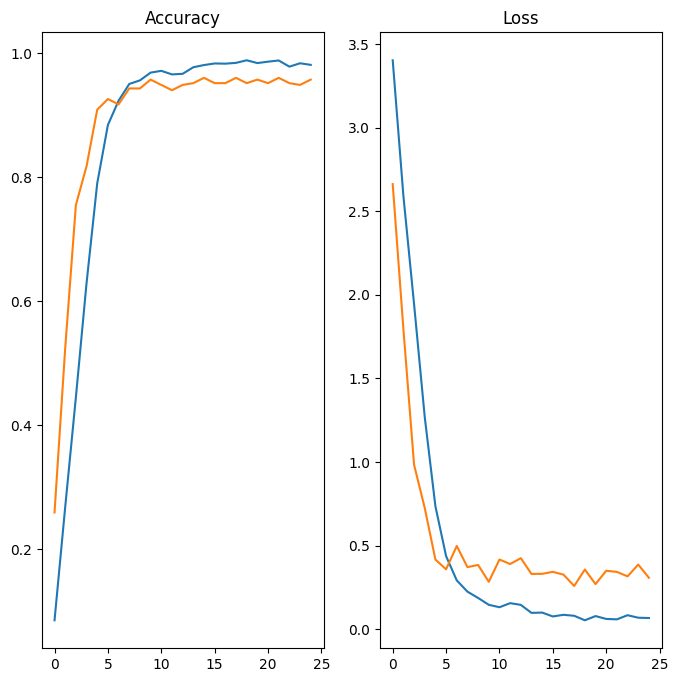

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [41]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [42]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [43]:
score = tf.nn.softmax(predict)

In [44]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.99


In [45]:
model.save('Image_classify.keras')